
EMPLOYEE SALARY DATA PREDICTION

In [37]:
import pandas as pd

In [38]:
df=pd.read_csv("Salary Data.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [40]:
df.shape

(375, 6)

In [41]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [42]:
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0
374,44.0,Female,PhD,Senior Business Analyst,15.0,150000.0


In [43]:
#null values
df.isnull()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
370,False,False,False,False,False,False
371,False,False,False,False,False,False
372,False,False,False,False,False,False
373,False,False,False,False,False,False


In [44]:
#null values sum
df.isnull().sum()

,0
Age,2
Gender,2
Education Level,2
Job Title,2
Years of Experience,2
Salary,2


In [45]:
# Gender counts
df['Gender'].value_counts()



,count
Gender,
Male,194
Female,179


In [46]:

# Education Level counts
df['Education Level'].value_counts()

# Job Title counts
df['Job Title'].value_counts()

,count
Job Title,
Director of Marketing,12
Director of Operations,11
Senior Business Analyst,10
Senior Marketing Manager,9
Senior Marketing Analyst,9
...,...
Junior Social Media Specialist,1
Junior Operations Coordinator,1
Senior HR Specialist,1


In [47]:

# Job Title counts
df['Job Title'].value_counts()

,count
Job Title,
Director of Marketing,12
Director of Operations,11
Senior Business Analyst,10
Senior Marketing Manager,9
Senior Marketing Analyst,9
...,...
Junior Social Media Specialist,1
Junior Operations Coordinator,1
Senior HR Specialist,1


In [48]:
#Replace all "?" with "Other" (for entire DataFrame):
df.replace('?', 'Other', inplace=True)


In [49]:
df.shape

(375, 6)

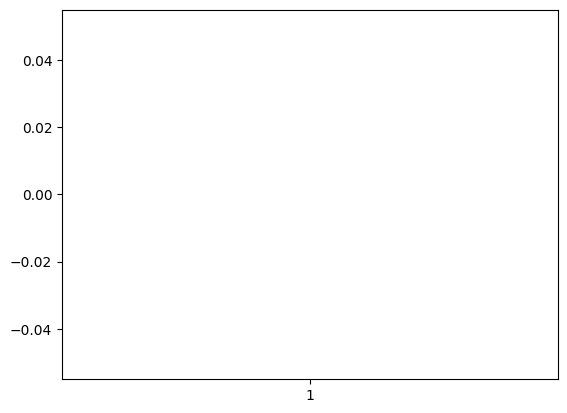

In [50]:
#outlier
import matplotlib.pyplot as plt
plt.boxplot(df['Age'])
plt.show()

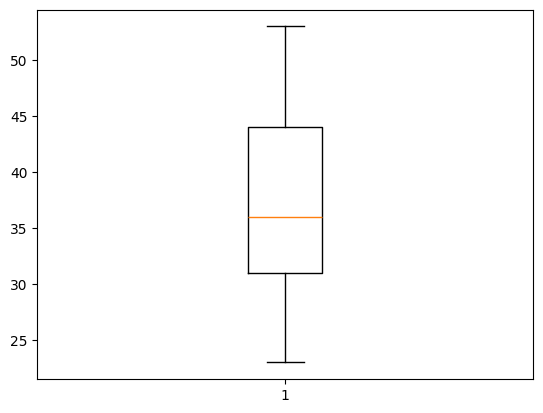

In [51]:
# Keep age within a reasonable range
df = df[(df['Age'] <= 75) & (df['Age'] >= 18)]

# Visualize after outlier removal
plt.boxplot(df['Age'])
plt.show()


In [52]:
#labelencoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Education Level'] = le.fit_transform(df['Education Level'])
df['Job Title'] = le.fit_transform(df['Job Title'])



/tmp/ipython-input-52-935246877.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = le.fit_transform(df['Gender'])
/tmp/ipython-input-52-935246877.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education Level'] = le.fit_transform(df['Education Level'])
/tmp/ipython-input-52-935246877.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [53]:
x = df[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
x

,Age,Gender,Education Level,Job Title,Years of Experience
0,32.0,1,0,159,5.0
1,28.0,0,1,17,3.0
2,45.0,1,2,130,15.0
3,36.0,0,0,101,7.0
4,52.0,1,1,22,20.0
...,...,...,...,...,...
370,35.0,0,0,131,8.0
371,43.0,1,1,30,19.0
372,29.0,0,0,70,2.0
373,34.0,1,0,137,7.0


In [54]:
y = df['Salary']  # This is your target
y

,Salary
0,90000.0
1,65000.0
2,150000.0
3,60000.0
4,200000.0
...,...
370,85000.0
371,170000.0
372,40000.0
373,90000.0


In [55]:
#minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0.3       , 1.        , 0.        , 0.91907514, 0.2       ],
       [0.16666667, 0.        , 0.5       , 0.0982659 , 0.12      ],
       [0.73333333, 1.        , 1.        , 0.75144509, 0.6       ],
       ...,
       [0.2       , 0.        , 0.        , 0.40462428, 0.08      ],
       [0.36666667, 1.        , 0.        , 0.79190751, 0.28      ],
       [0.7       , 0.        , 1.        , 0.63583815, 0.6       ]])

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [57]:
x_train

array([[0.36666667, 1.        , 0.        , 0.8150289 , 0.28      ],
       [0.46666667, 1.        , 0.        , 0.55491329, 0.4       ],
       [0.2       , 0.        , 0.        , 0.32369942, 0.08      ],
       ...,
       [0.46666667, 1.        , 0.        , 0.68208092, 0.32      ],
       [0.7       , 0.        , 1.        , 0.66473988, 0.64      ],
       [0.86666667, 0.        , 0.5       , 0.70520231, 0.76      ]])

In [58]:
#machine learninig algorthim
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [59]:
y_pred=knn.predict(x_test)
y_pred

array([170000.,  60000., 110000.,  90000., 150000., 160000., 130000.,
       105000.,  55000.,  95000., 150000., 110000.,  35000.,  95000.,
       150000.,  55000.,  90000.,  45000.,  90000.,  90000., 150000.,
        90000., 150000.,  70000.,  90000.,  50000., 150000.,  40000.,
       110000., 170000.,  85000., 110000.,  45000., 150000.,  80000.,
        40000., 160000.,  40000., 150000.,  60000.,  40000.,  95000.,
       110000., 170000.,  40000., 150000., 150000.,  95000.,  35000.,
        55000., 170000.,  90000., 130000.,  95000., 110000., 120000.,
       150000.,  90000., 170000., 105000., 110000., 150000., 180000.,
        60000.,  45000.,  45000.,  50000.,  80000.,  40000.,  35000.,
        60000.,  95000.,  60000., 140000.,  90000.])

In [60]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)
print(accuracy*100,"%");

30.666666666666664 %


In [61]:
#machine learninig algorthim
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

In [62]:
y_pred1=knn.predict(x_test)
y_pred1

array([170000.,  60000., 110000.,  90000., 150000., 160000., 130000.,
       105000.,  55000.,  95000., 150000., 110000.,  35000.,  95000.,
       150000.,  55000.,  90000.,  45000.,  90000.,  90000., 150000.,
        90000., 150000.,  70000.,  90000.,  50000., 150000.,  40000.,
       110000., 170000.,  85000., 110000.,  45000., 150000.,  80000.,
        40000., 160000.,  40000., 150000.,  60000.,  40000.,  95000.,
       110000., 170000.,  40000., 150000., 150000.,  95000.,  35000.,
        55000., 170000.,  90000., 130000.,  95000., 110000., 120000.,
       150000.,  90000., 170000., 105000., 110000., 150000., 180000.,
        60000.,  45000.,  45000.,  50000.,  80000.,  40000.,  35000.,
        60000.,  95000.,  60000., 140000.,  90000.])

In [63]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred1,y_test)
print(accuracy*100,"%");

30.666666666666664 %


In [64]:
# Neural Network using MLPClassifier
from sklearn.neural_network import MLPClassifier

# Create and train the model
mlp = MLPClassifier(solver='adam',hidden_layer_sizes=(5,2), max_iter=300, random_state=42)
mlp.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=300, random_state=42)

In [65]:
y_pred_mlp = mlp.predict(x_test)
y_pred_mlp

array([150000., 180000., 150000., 180000., 150000., 180000., 180000.,
       150000.,  40000., 180000., 180000., 150000.,  40000., 150000.,
       150000.,  40000., 150000.,  40000., 150000., 150000., 150000.,
       150000., 150000.,  40000., 180000.,  40000., 150000.,  40000.,
       180000., 150000.,  40000., 180000.,  40000., 180000., 180000.,
        40000., 150000.,  40000., 180000.,  40000.,  40000., 150000.,
       150000., 150000.,  40000., 180000., 150000., 150000.,  40000.,
        40000., 150000., 150000., 150000., 180000., 150000., 150000.,
       180000., 110000., 150000., 150000., 180000., 180000., 180000.,
        40000.,  40000.,  40000.,  40000., 180000.,  40000.,  40000.,
        40000., 180000.,  40000., 180000., 150000.])

In [66]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred_mlp,y_test)
print(accuracy*100,"%");

9.333333333333334 %


Original DataFrame head:
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  

Original DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years

/tmp/ipython-input-67-1348647509.py:144: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


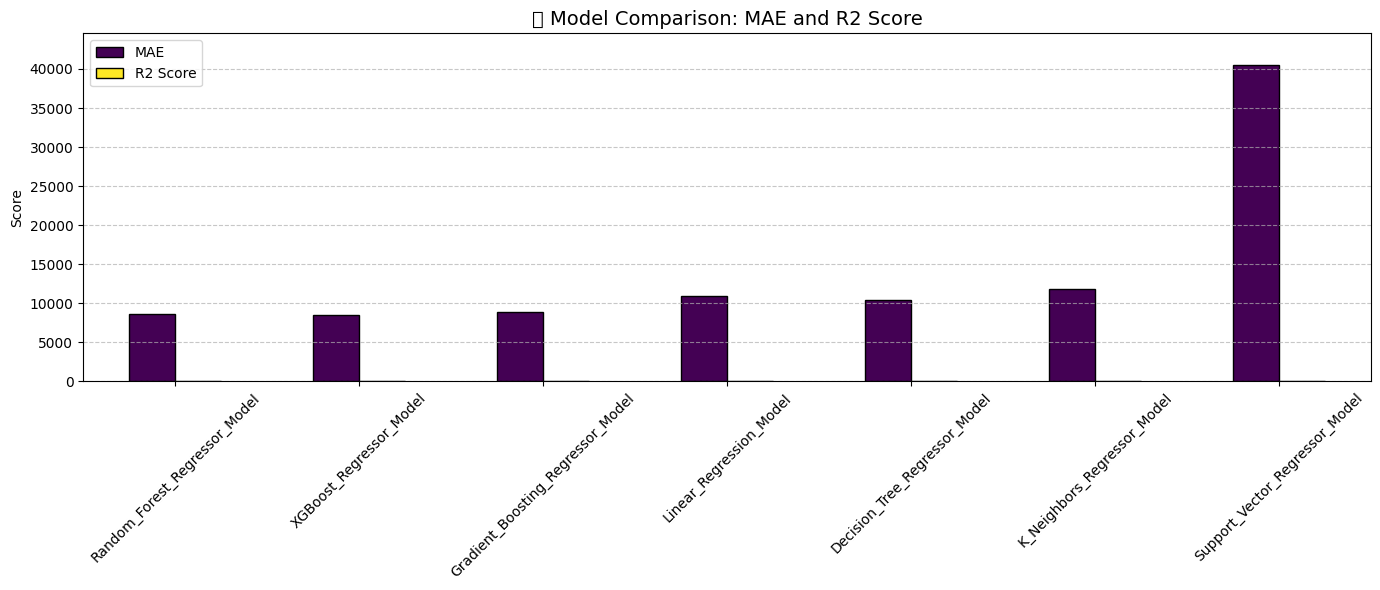


✅ Best regression model 'Random_Forest_Regressor_Model' saved as 'salary_model.pkl'
MinMaxScaler saved as 'scaler1.pkl'
LabelEncoders saved as 'label_encoders.pkl'


In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder # StandardScaler is removed from pipeline
import joblib
import random

# Import REGRESSION models and metrics
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt

# --- 1. Load the new dataset ---
# Make sure 'Salary Data.csv' is in the same directory as your notebook
df = pd.read_csv("Salary Data.csv")

print("Original DataFrame head:")
print(df.head())
print("\nOriginal DataFrame info:")
df.info()

# --- 2. Data Cleaning and Preprocessing ---
# Drop rows with any missing values (common for clean datasets like this)
df.dropna(inplace=True)
print(f"\nDataFrame after dropping NaNs: {df.shape[0]} rows")

# --- 3. Feature Engineering / Label Encoding for Categorical Features ---
# Identify categorical features in the new dataset
categorical_features_new = ['Gender', 'Education Level', 'Job Title']

le_dict = {} # To store individual LabelEncoders for later use (e.g., in app.py or for reference)

for col in categorical_features_new:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le # Store the fitted encoder

    # Print the mapping for HTML/app.py reference
    print(f"\n--- LabelEncoder Mapping for '{col}': ---")
    for i, item in enumerate(le.classes_):
        print(f"'{item}': {i}")
    print("------------------------------------------")

# --- 4. Define Features (X) and Target (y) for the new dataset ---
# Features: Age, Gender, Education Level, Job Title, Years of Experience
X = df[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
# Target: Salary
y = df['Salary']

print("\nFeatures (X) head after encoding:")
print(X.head())
print("\nTarget (y) head:")
print(y.head())

# --- 5. Feature Scaling (MinMaxScaler) ---
# Apply MinMaxScaler to all features before the train-test split
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns) # Convert back to DataFrame for consistency

print("\nFeatures (X) head after scaling:")
print(X.head())

# --- 6. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 7. Define REGRESSION models ---
# Model names can be changed as requested
models = {
    "Linear_Regression_Model": LinearRegression(),
    "Random_Forest_Regressor_Model": RandomForestRegressor(random_state=42, n_jobs=-1),
    "K_Neighbors_Regressor_Model": KNeighborsRegressor(),
    "Support_Vector_Regressor_Model": SVR(),
    "Gradient_Boosting_Regressor_Model": GradientBoostingRegressor(random_state=42),
    "Decision_Tree_Regressor_Model": DecisionTreeRegressor(random_state=42),
    "XGBoost_Regressor_Model": XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
}

# --- 8. Initialize results and best model tracking ---
results = {}
best_r2 = -np.inf
best_pipeline = None # Will store the pipeline (just the model, as scaling is external)
best_model_name = ""

# --- 9. Loop through models and evaluate ---
for name, model in models.items():
    # Since X is already scaled by MinMaxScaler, the pipeline will only contain the model
    pipe = Pipeline([
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Calculate REGRESSION metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store all metrics
    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "R2 Score": r2
    }

    # Print model report
    print(f"\n🔍 Model: {name}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R2): {r2:.4f}")

    # Track best model based on R2 score (higher is better)
    if r2 > best_r2:
        best_r2 = r2
        best_pipeline = pipe # Store the pipeline
        best_model_name = name

# --- 10. Display final summary table ---
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R2 Score", ascending=False)
print("\n📊 Model Performance Summary (Regression Metrics):")
print(results_df)

# --- 11. Plotting ---
results_df[["MAE", "R2 Score"]].plot(
    kind='bar',
    figsize=(14, 6),
    colormap='viridis',
    edgecolor='black'
)

plt.title("📊 Model Comparison: MAE and R2 Score", fontsize=14)
plt.ylabel("Score")
plt.ylim(results_df[["MAE", "R2 Score"]].min().min() * 0.9, results_df[["MAE", "R2 Score"]].max().max() * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 12. Save best model and scaler ---
# Save the best pipeline (which contains the best regression model)
joblib.dump(best_pipeline, 'salary_model.pkl')
print(f"\n✅ Best regression model '{best_model_name}' saved as 'salary_model.pkl'")

# Save the MinMaxScaler (used for feature scaling in app.py)
joblib.dump(scaler, 'scaler1.pkl')
print("MinMaxScaler saved as 'scaler1.pkl'")

# Save the LabelEncoders for reference in app.py or HTML
joblib.dump(le_dict, 'label_encoders.pkl')
print("LabelEncoders saved as 'label_encoders.pkl'")


In [68]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("Salary Data.csv")
df = df.dropna()

# Label encode categorical columns
df_encoded = df.copy()
le_gender = LabelEncoder()
le_edu = LabelEncoder()
le_job = LabelEncoder()

df_encoded["Gender"] = le_gender.fit_transform(df_encoded["Gender"])
df_encoded["Education Level"] = le_edu.fit_transform(df_encoded["Education Level"])
df_encoded["Job Title"] = le_job.fit_transform(df_encoded["Job Title"])

X = df_encoded.drop("Salary", axis=1)
y = df_encoded["Salary"]

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Streamlit App UI
st.title("Employee Salary Prediction")

st.markdown("Enter employee details to estimate their salary:")

age = st.slider("Age", 18, 65, 30)
gender = st.selectbox("Gender", df["Gender"].unique())
education = st.selectbox("Education Level", df["Education Level"].unique())
job = st.selectbox("Job Title", df["Job Title"].unique())
experience = st.slider("Years of Experience", 0, 40, 5)

# Encode user input
input_data = pd.DataFrame({
    "Age": [age],
    "Gender": le_gender.transform([gender]),
    "Education Level": le_edu.transform([education]),
    "Job Title": le_job.transform([job]),
    "Years of Experience": [experience]
})

# Predict
predicted_salary = model.predict(input_data)[0]

st.subheader("Predicted Salary:")
st.success(f"${predicted_salary:,.2f}")


Overwriting app.py


In [69]:
!pip install streamlit pyngrok

In [70]:
#give your own ngrok authtoken
!ngrok authtoken 30F2VpFdwSurjwfYfsc0Cm9ImRo_7SpgoUPz8jyWiTvhVPaF6

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [71]:
import os
import threading

def run_streamlit() :
  os.system('streamlit run app.py --server.port 8501')

thread=threading.Thread(target=run_streamlit)
thread.start()

In [72]:
from pyngrok import ngrok
import time
time.sleep(5)
public_url = ngrok.connect(8501)
print("Your Streamlit app is live here:", public_url)

Your Streamlit app is live here: NgrokTunnel: "https://d5b33ad75e23.ngrok-free.app" -> "http://localhost:8501"
